# Microsoft Breaking into Film Analysis

Author: Tisa Yip
***

## Overview

Descriptive analysis of popular films over the last 3 years to gain insight into what type of movie would be best to begin Microsoft's foray into film making.
   <br><li>Top 10 movies</li>
   <br><li>Top 10 genres</li>
   <br><li>Top 10 film studios</li>


## Business Problem

Microsoft want insights on where to begin their movie making journey. 
My data analysis queries were based on popularity, whether it be monetary or subjective.
These questions are important to form a basis on what is successful and to make recommendations tapping into that.

## Data Understanding

The data used in this analysis is from IMDB and Box Office Mojo. <br>These sites contain relevant information about recent commercialised films and gives a breakdown of their revenue, ratings, titles and year released.

<br>I'll be using revenue as the target variable in relation to titles and film studios and ratings in relation to genre, to gain insight into where they overlap.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

warnings.filterwarnings('ignore')

In [2]:
movie_titles = pd.read_csv(r"C:\Users\61405\Documents\Project1\zippedData\imdb.title.basics.csv.gz")
movie_ratings = pd.read_csv(r"C:\Users\61405\Documents\Project1\zippedData\imdb.title.ratings.csv.gz")
box_office = pd.read_csv(r"C:\Users\61405\Documents\Project1\zippedData\bom.movie_gross.csv.gz")

## Data Preparation

I checked the databases for missing data. <br>I dropped columns which I wouldn't be using for analysis. I also removed rows with NaN values and filled zero into null. I merged databases and dropped duplicates.
<br>I made these choices to give me a more concise dataframe to work with. Data I didn't need would just be taking up space and rows with NaN or null values would be unlikely be in the top 10 films that I would be analysing.




In [3]:
missing_values_titles = movie_titles.isna().sum()
missing_values_titles
# Checking missing data

tidy_titles = movie_titles.drop(columns=['runtime_minutes'])
# Runtime minutes had the most missing data so I decided not to use them for analysis

missing_values_box = box_office.isna().sum()
missing_values_box

box_office['foreign_gross'].fillna(0,inplace=True)
box_office['domestic_gross'].fillna(0,inplace=True)
# filling missing data with 0 

missing_values_ratings = movie_ratings.isna().sum()
missing_values_ratings

# merging two dataframes together on the common 'tconst'. Inner so it eliminates the rows without matches
title_rating = pd.merge(
     tidy_titles, movie_ratings, how="inner", on=['tconst']
 )

# Renamed the coloumn so I could merge with the new dataframe
title_rating_rename = title_rating.rename(columns={'primary_title':'title'})

# merged all df's together
t_r_b = pd.merge(
     title_rating_rename, box_office, how="inner", on=['title']
 )

# cleaning up the new dataframe
tidy_t_r_b = t_r_b.drop(columns=['tconst','start_year','original_title'])
tidy_t_r_b

# Wanted the latest movies up top
tidy_t_r_b.sort_values(by='year', ascending=False)

# only want to analyse the last 3 years of movie data
tidy1_t_r_b = tidy_t_r_b[tidy_t_r_b['year'].between(2016,2018)]
tidy1_t_r_b

#below process was to make foreign_gross into a float as it was an object at first which meant I couldn't add to domestic_gross

tidy1_t_r_b['foreign_gross'] = tidy1_t_r_b['foreign_gross'].astype(str)
tidy1_t_r_b['foreign_gross'] = tidy1_t_r_b['foreign_gross'].str.replace(',', '')
tidy1_t_r_b['foreign_gross'] = pd.to_numeric(tidy1_t_r_b['foreign_gross'])
tidy1_t_r_b.dtypes

tidy2_t_r_b = tidy1_t_r_b.sort_values(by='year', ascending=False)

# New column with sum of foreign and domestic gross
# df['sum'] = df.apply(lambda row: row['column1'] + row['column2'], axis=1)
tidy2_t_r_b['worldwide_gross'] = tidy2_t_r_b.apply(lambda row: row['domestic_gross'] + row['foreign_gross'], axis=1)

tidy2_t_r_b.drop_duplicates(subset=['title'])

# Dropping any missing rows
tidy2_t_r_b.dropna(inplace=True)

# rounding rating to the nearest whole number
tidy2_t_r_b['averagerating'] = tidy2_t_r_b.averagerating.apply(round)
tidy2_t_r_b.head()

# Wanted to separate the genres column into their individual values
tidy_exploded = tidy2_t_r_b.assign(genres = tidy2_t_r_b.genres.str.split(",")).explode("genres")

tidy_exploded.head()

top_10_gross = tidy2_t_r_b.nlargest(10, 'worldwide_gross')

# With the exploded data, there are now duplicate rows. I wanted to see how many rows were now in the Top 10
result = tidy_exploded.loc[[1301,1984,2703,2373,2335,695,2432,2324,1778,2165], 'title']

top_10_gross_tidy = tidy_exploded.nlargest(30, 'worldwide_gross')

# Analysing the data over 3 years of genre and rating
sorted_genres = tidy_exploded.sort_values(['averagerating']).groupby('genres')
all_dfs_list = []
for value, group in sorted_genres:
    all_dfs_list.append(group.reset_index(drop=True))

top_genre_rate = sorted_genres['averagerating'].mean()

top10_genre_rate = top_genre_rate.nlargest(10)

top_genre_dollars = sorted_genres['worldwide_gross'].mean()

sorted_studios = tidy2_t_r_b.sort_values(['worldwide_gross']).groupby('studio')
all_dfs_list = []
for value, group in sorted_studios:
    all_dfs_list.append(group.reset_index(drop=True))

studio_dollars = sorted_studios['worldwide_gross'].mean()

top_studio_dollars = studio_dollars.nlargest(10)


## Data Modeling
I used bar charts for my analysis as they give a clear picture about what is highest.

Firstly, I wanted to find the top 10 films based on revenue. This is a great indication about what type of movies consumers buy into.
Next, I wanted the results of top 10 genres based on viewer ratings. There is a table of the top 10 films with their genre so I can see which genres correlate.
lastly, I wanted to find top 10 film studios in relation to revenue.

These choices are appropriate because Microsoft are wanting to start out on a new venture, decisions need to be made based on what is successfull to try and emulate similar success in that business.


<AxesSubplot:title={'center':'Top 10 Films in Revenue'}, xlabel='Film Title', ylabel='Dollars in Billions'>

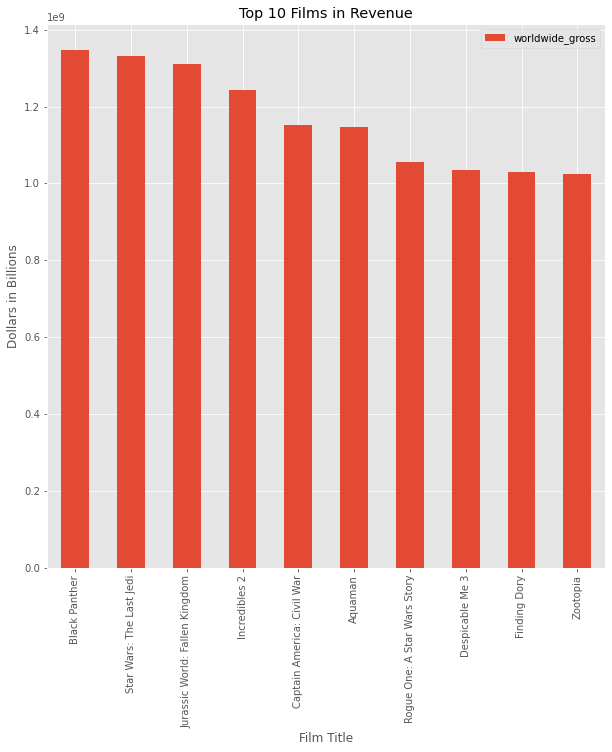

In [4]:
top_10_gross.plot('title', 'worldwide_gross', kind='bar', xlabel ='Film Title', ylabel ='Dollars in Billions', title = 'Top 10 Films in Revenue')



,title,genres
1301,Black Panther,"Action,Adventure,Sci-Fi"
1984,Star Wars: The Last Jedi,"Action,Adventure,Fantasy"
2703,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi"
2373,Incredibles 2,"Action,Adventure,Animation"
2335,Captain America: Civil War,"Action,Adventure,Sci-Fi"
695,Aquaman,"Action,Adventure,Fantasy"
2432,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi"
2324,Despicable Me 3,"Adventure,Animation,Comedy"
1778,Finding Dory,"Adventure,Animation,Comedy"
2165,Zootopia,"Adventure,Animation,Comedy"


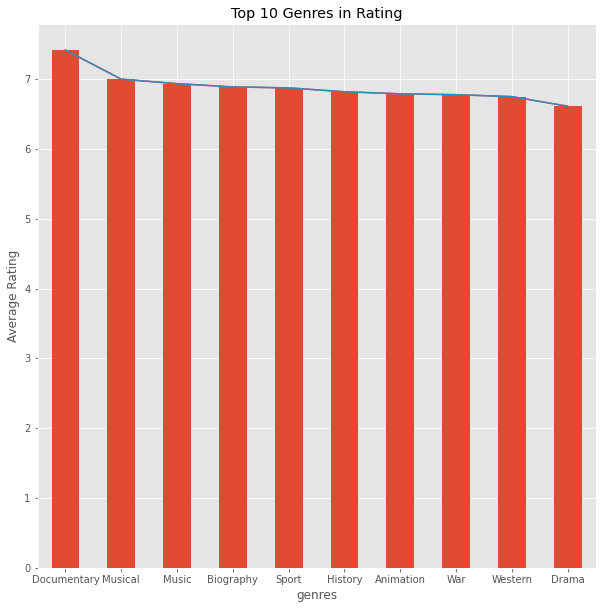

In [5]:
top10_genre_rate.plot(kind='bar')
top10_genre_rate.plot(ylabel = 'Average Rating')
top10_genre_rate.plot(title = 'Top 10 Genres in Rating')


top_genres_count = top_10_gross.loc[:,'title':'genres']
top_genres_count.style

,title,studio
1301,Black Panther,BV
1984,Star Wars: The Last Jedi,BV
2703,Jurassic World: Fallen Kingdom,Uni.
2373,Incredibles 2,BV
2335,Captain America: Civil War,BV
695,Aquaman,WB
2432,Rogue One: A Star Wars Story,BV
2324,Despicable Me 3,Uni.
1778,Finding Dory,BV
2165,Zootopia,BV


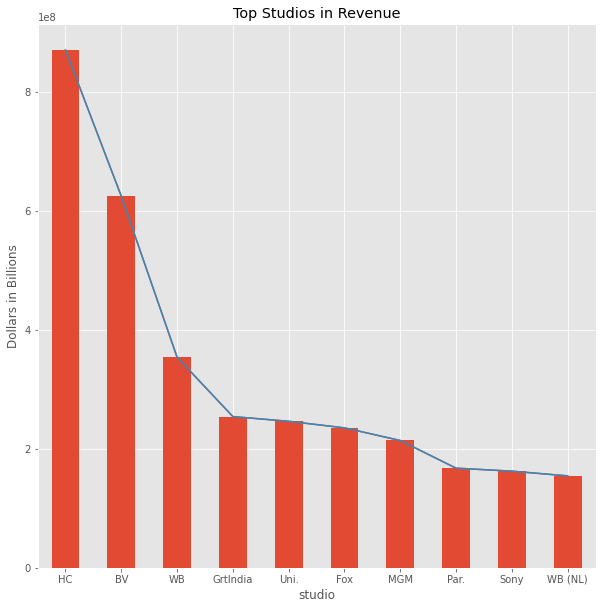

In [6]:
top_studio_dollars.plot(kind='bar')
top_studio_dollars.plot(ylabel = 'Dollars in Billions')
top_studio_dollars.plot(title = 'Top Studios in Revenue')

top_studio = top_10_gross.loc[:,['title','studio']]
top_studio.style

## Evaluation
The top 10 films have all had over 1 Billion dollars in worldwide revenue.

Of the top 10 movies 4 are animation and animation is in the top 10 genres under user ratings. Also adventure featured in all Top 10 movies.

BV (Buena Vista) is the second highest grossing film studio and within the top 10 movies, 7 were from BV.

The results of my model are a solid basis to begin with and results would generalize wth the updates of new movies being added.



## Conclusions
<li> Start with making movies in animation with an adventure storyline</li>
<li> Choose a niche and make that your target market </li>
<li> Based on the top 10 grossing films, making movies from popular comic book characters is a good option.</li>

My analysis is dependant upon whether Microsoft want to just make big box office hits or if they want to make more meaningful films.
Genres by rating indicates that viewers rate documentaries highly for instance, however that doesn't show in the dollar amounts.
